In [2]:
import pandas as pd

In [ ]:
#import dataset from demo.py output
df_og = pd.read_csv("data/df_demo.csv")
df_og.head()

C:\Users\rohha\AppData\Local\Temp\ipykernel_19852\3920363316.py:1: DtypeWarning: Columns (53,57,69,71,77,79,87,89,91,93,95,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og = pd.read_csv("df_demo.csv")


,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE_CRASH,LONGITUDE_CRASH,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,2023-11-01,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-14,17:05,NaN,11249.0,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_og.shape

(1655628, 104)

In [ ]:
#Remove the duplicate and attribute columns
df = df_og.loc[:, ~df_og.columns.str.endswith('_ATTRIBUTES')]

duplicate_columns = ["LOCATION", "LATITUDE_ACCIDENT", "LONGITUDE_ACCIDENT", "DATE_CRASH", "DATE_WEATHER_STATION", "ZIP_CODE_IMPUTED"]
df = df.drop(columns=duplicate_columns)


In [ ]:
#Calculate percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_df = missing_percentage.to_frame(name='Missing Percentage').sort_values(by='Missing Percentage', ascending=False)
missing_percentage_df

,Missing Percentage
MDSF,100.000000
WT10,100.000000
WT11,100.000000
DASF,100.000000
PSUN,99.999879
...,...
NUMBER_OF_PEDESTRIANS_KILLED,0.000000
NUMBER_OF_CYCLIST_KILLED,0.000000
NUMBER_OF_CYCLIST_INJURED,0.000000
NUMBER_OF_MOTORIST_KILLED,0.000000


In [185]:
pd.options.display.max_seq_items = 105
missing_percentage_df[missing_percentage_df['Missing Percentage'] < 50]

,Missing Percentage
CROSS_STREET_NAME,42.207126
SNOW,27.068399
BOROUGH,26.625063
ON_STREET_NAME,22.993269
VEHICLE_TYPE_CODE_2,21.704634
CONTRIBUTING_FACTOR_VEHICLE_2,16.875349
PRCP,1.989457
VEHICLE_TYPE_CODE_1,0.824763
CONTRIBUTING_FACTOR_VEHICLE_1,0.393385
ZIP_CODE,0.079849


In [186]:
missing_percentage_df[missing_percentage_df['Missing Percentage'] >= 50]

,Missing Percentage
MDSF,100.000000
WT10,100.000000
WT11,100.000000
DASF,100.000000
PSUN,99.999879
TSUN,99.985685
WT05,99.966659
WT09,99.927580
WT06,99.714006
WT04,99.652156


In [ ]:
#Remove all columns with more than 60% missing data
df = df.loc[:, df.isnull().mean() <= 0.6]
df.head()


,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE_CRASH,LONGITUDE_CRASH,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,...,DISTANCE_FROM_WEATHER_STATION,NAME,LATITUDE_WEATHER_STATION.1,LONGITUDE_WEATHER_STATION.1,ELEVATION,PRCP,SNOW,SNWD,TMAX,TMIN
0,2023-11-01,1:29,BROOKLYN,11230.0,40.621790,-73.970024,OCEAN PARKWAY,AVENUE K,1.0,0.0,...,0.039986,"BROOKLYN 2.4 WSW, NY US",40.659680,-73.982799,51.8,0.01,NaN,NaN,NaN,NaN
1,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,NaN,NaN,0.0,0.0,...,0.025667,"HOWARD BEACH 0.4 NNW, NY US",40.662099,-73.841345,2.1,0.00,0.0,NaN,NaN,NaN
2,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,...,0.069438,"BROOKLYN 3.1 NW, NY US",40.684600,-73.986700,5.5,0.00,0.0,0.0,NaN,NaN
3,2021-12-14,17:05,NaN,11249.0,40.709183,-73.956825,BROOKLYN QUEENS EXPRESSWAY,NaN,0.0,0.0,...,0.038689,"BROOKLYN 3.1 NW, NY US",40.684600,-73.986700,5.5,0.00,0.0,0.0,NaN,NaN
4,2021-12-14,8:17,BRONX,10475.0,40.868160,-73.831480,NaN,NaN,2.0,0.0,...,0.101242,"LAGUARDIA AIRPORT, NY US",40.779450,-73.880270,3.0,0.00,0.0,0.0,54.0,44.0


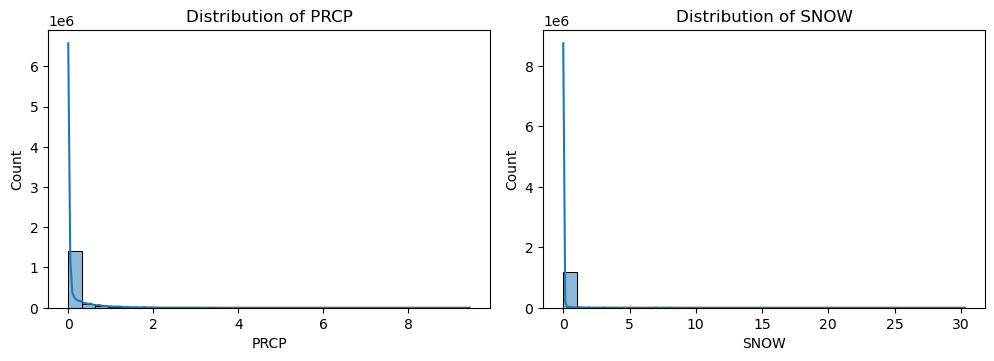

In [ ]:
#Create histograms for PRCP and SNOW
import matplotlib.pyplot as plt
import seaborn as sns


impute_columns = ["PRCP", "SNOW"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(impute_columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
#Impute missing data for PRCP and SNOW
from fancyimpute import IterativeImputer
df[impute_columns] = IterativeImputer(max_iter=10, random_state=42).fit_transform(df[impute_columns])

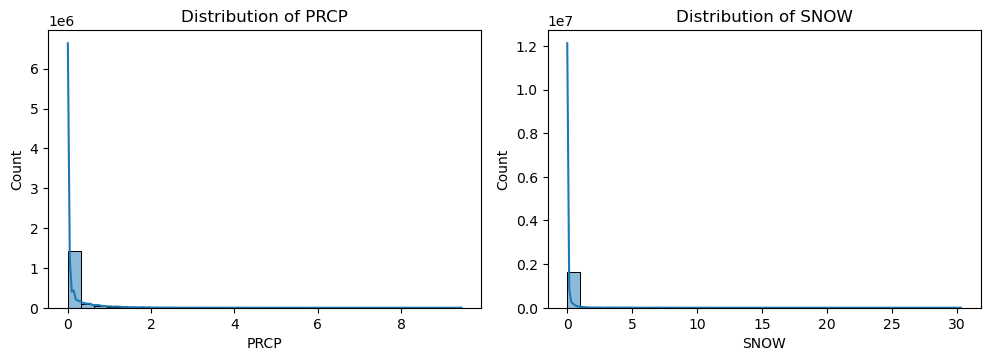

In [ ]:
#Plot histograms for PRCP and SNOW again 
plt.figure(figsize=(15, 10))

for i, col in enumerate(impute_columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [194]:
df.dtypes

CRASH_DATE                        object
CRASH_TIME                        object
BOROUGH                           object
ZIP_CODE                         float64
LATITUDE_CRASH                   float64
LONGITUDE_CRASH                  float64
ON_STREET_NAME                    object
CROSS_STREET_NAME                 object
NUMBER_OF_PERSONS_INJURED        float64
NUMBER_OF_PERSONS_KILLED         float64
NUMBER_OF_PEDESTRIANS_INJURED      int64
NUMBER_OF_PEDESTRIANS_KILLED       int64
NUMBER_OF_CYCLIST_INJURED          int64
NUMBER_OF_CYCLIST_KILLED           int64
NUMBER_OF_MOTORIST_INJURED         int64
NUMBER_OF_MOTORIST_KILLED          int64
CONTRIBUTING_FACTOR_VEHICLE_1     object
CONTRIBUTING_FACTOR_VEHICLE_2     object
COLLISION_ID                       int64
VEHICLE_TYPE_CODE_1               object
VEHICLE_TYPE_CODE_2               object
STATION                           object
LATITUDE_WEATHER_STATION         float64
LONGITUDE_WEATHER_STATION        float64
DISTANCE_FROM_WE

In [ ]:
#Convert date and time to datetime types and then combine them
df["CRASH_DATE2"] = pd.to_datetime(df["CRASH_DATE"], errors='coerce')
df["CRASH_TIME2"] = pd.to_datetime(df["CRASH_TIME"], format="%H:%M", errors='coerce').dt.time
df["CRASH_DATETIME"] = pd.to_datetime(df["CRASH_DATE2"].astype(str) + " " + df["CRASH_TIME2"].astype(str), errors='coerce')

In [ ]:
#Create new columns from datetime column
df["YEAR"] = df["CRASH_DATETIME"].dt.year
df["MONTH"] = df["CRASH_DATETIME"].dt.month
df["DAY"] = df["CRASH_DATETIME"].dt.day
df["HOUR"] = df["CRASH_DATETIME"].dt.hour

In [ ]:
#Remore more duplicate columns
duplicate_columns = ["CRASH_DATE", "CRASH_TIME", "CRASH_DATE2", "CRASH_TIME2", "LATITUDE_WEATHER_STATION.1", "LONGITUDE_WEATHER_STATION.1"]
df = df.drop(columns=duplicate_columns)

In [ ]:
#Replace missing values in string columns with 'MISSING'
df.loc[:, df.dtypes == "object"] = df.loc[:, df.dtypes == "object"].fillna("MISSING")


,Missing Percentage
TMAX,982582
TMIN,982570
SNWD,836121
ZIP_CODE,1322
NUMBER_OF_PERSONS_KILLED,28
NUMBER_OF_PERSONS_INJURED,16
BOROUGH,0
LATITUDE_CRASH,0
CROSS_STREET_NAME,0
ON_STREET_NAME,0


In [ ]:
#Drop missing rows 
df = df.dropna(subset=["ZIP_CODE", "NUMBER_OF_PERSONS_KILLED", "NUMBER_OF_PERSONS_INJURED"])
missing_percentage3 = df.isnull().sum()
missing_percentage3_df = missing_percentage3.to_frame(name='Missing Percentage').sort_values(by='Missing Percentage', ascending=False)
missing_percentage3_df

,Missing Percentage
TMAX,981280
TMIN,981268
SNWD,834867
LATITUDE_CRASH,0
ZIP_CODE,0
BOROUGH,0
LONGITUDE_CRASH,0
NUMBER_OF_PERSONS_KILLED,0
ON_STREET_NAME,0
CROSS_STREET_NAME,0


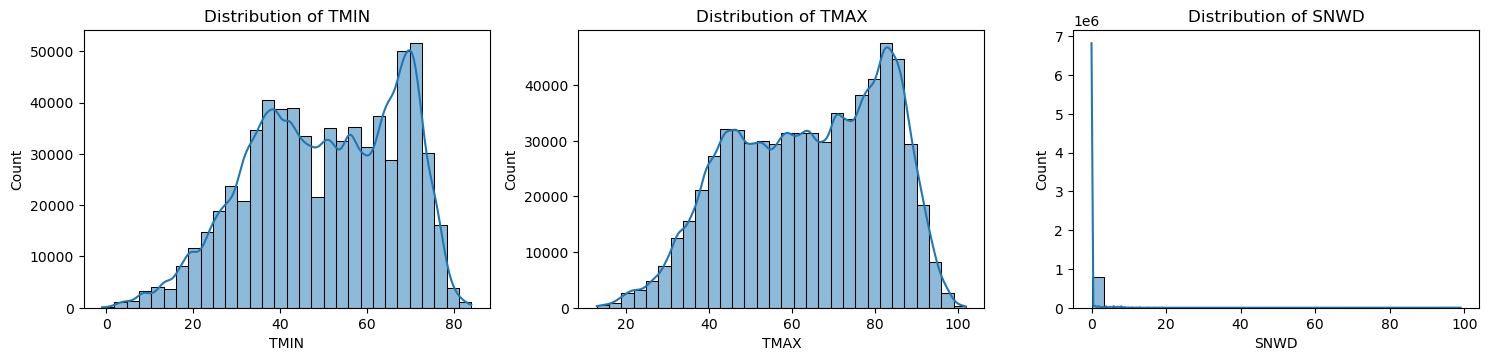

In [ ]:
#Plot histograms for TMIN, TMAX, and SNWD
impute_columns_2 = ["TMIN", "TMAX", "SNWD"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(impute_columns_2, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
#Create function to use decision tree to impute values in a given column
from sklearn.tree import DecisionTreeRegressor

features = ["PRCP", "SNOW", "MONTH", "LATITUDE_CRASH", "LONGITUDE_CRASH"]


def impute_with_decision_tree(df, target_column, features):
    df_train = df.dropna(subset=[target_column] + features)
    df_missing = df[df[target_column].isnull()]

    if df_missing.empty:
        return df

    model = DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(df_train[features], df_train[target_column])

    df.loc[df[target_column].isnull(), target_column] = model.predict(df_missing[features])
    return df


In [ ]:
#Impute TMIN, TMAX, SNWD using DT
df = impute_with_decision_tree(df, "TMIN", features)
df = impute_with_decision_tree(df, "TMAX", features)
df = impute_with_decision_tree(df, "SNWD", features)

,Missing Percentage
TMAX,981280
SNWD,834867
BOROUGH,0
LATITUDE_CRASH,0
ZIP_CODE,0
LONGITUDE_CRASH,0
ON_STREET_NAME,0
NUMBER_OF_PERSONS_KILLED,0
NUMBER_OF_PEDESTRIANS_INJURED,0
CROSS_STREET_NAME,0


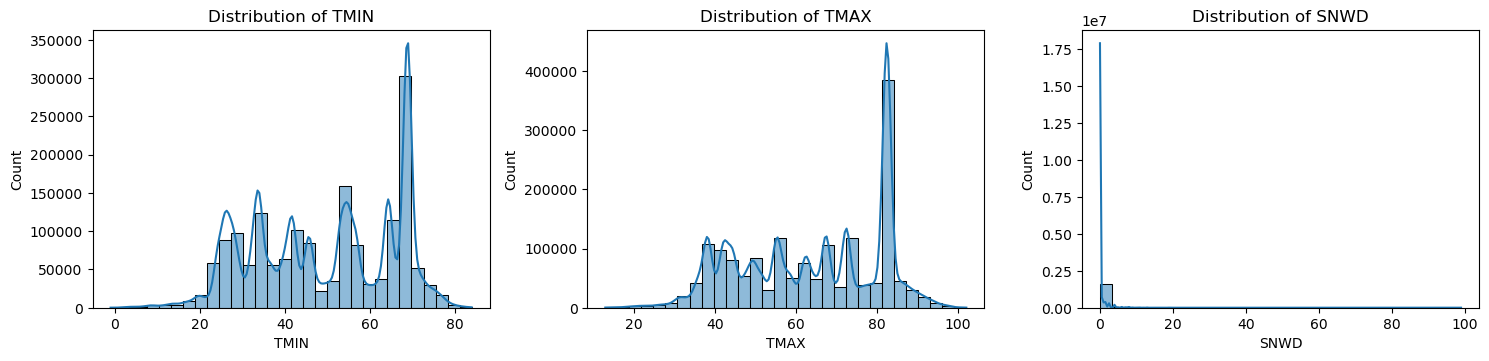

In [ ]:
#Plot histograms after imputation
impute_columns_2 = ["TMIN", "TMAX", "SNWD"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(impute_columns_2, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
#Convert zip code to string
df["ZIP_CODE"] = df["ZIP_CODE"].astype(str)

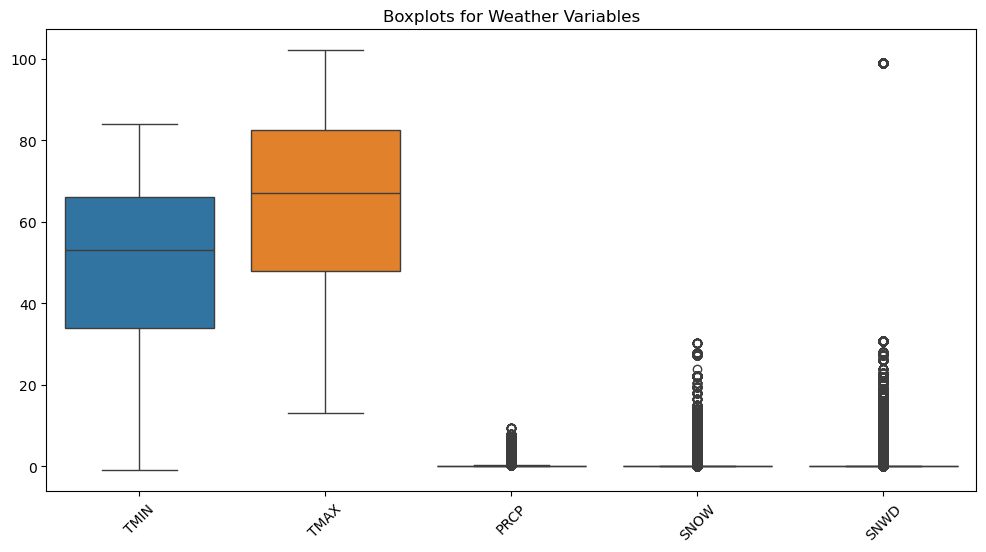

In [ ]:
#Boxplots for weather columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["TMIN", "TMAX", "PRCP", "SNOW", "SNWD"]])
plt.xticks(rotation=45)
plt.title("Boxplots for Weather Variables")
plt.show()

In [ ]:
#Check SNOW values for high SNWD values
df[df["SNWD"] > 40]["SNOW"].value_counts()

SNOW
0.0    137
Name: count, dtype: int64

In [ ]:
#Check most common SWND value for when SNOW = 0
df[df["SNOW"] == 0]["SNWD"].value_counts()

SNWD
0.000000     742439
0.001628     226216
0.013489      33047
1.194271      31621
0.131869      26194
              ...  
3.800000          4
0.600000          4
8.300000          3
16.000000         3
14.200000         1
Name: count, Length: 90, dtype: int64

In [ ]:
#Replace large values of SNWD with 0
df.loc[df["SNWD"] > 40, "SNWD"] = 0


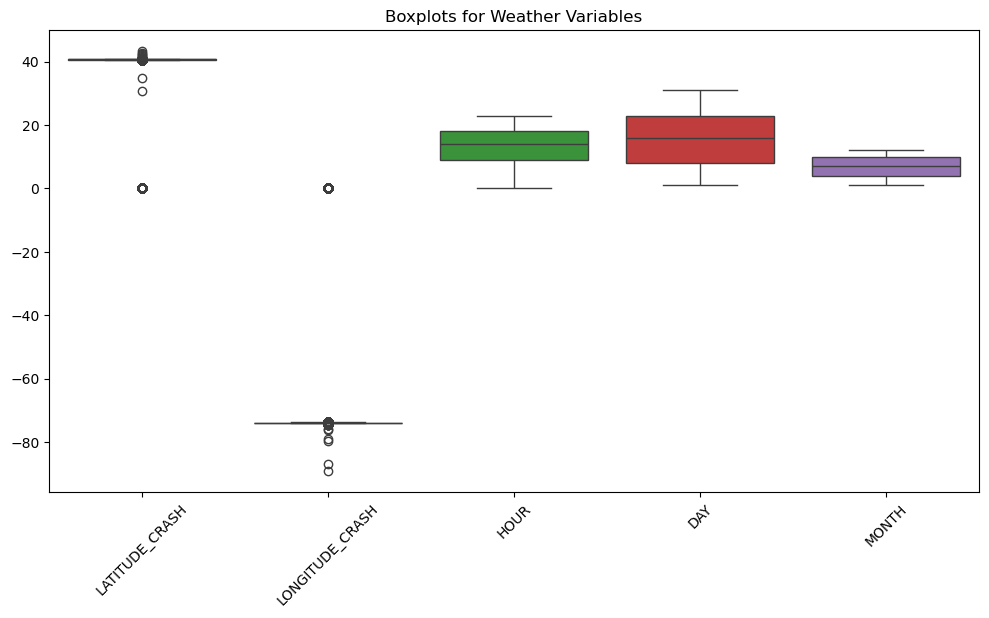

In [ ]:
#Plot lat, long, and time values
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["LATITUDE_CRASH", "LONGITUDE_CRASH", "HOUR", "DAY", "MONTH"]])
plt.xticks(rotation=45)
plt.title("Boxplots for Weather Variables")
plt.show()

In [ ]:
#Remove rows where lat/long = 0
df = df[df["LATITUDE_CRASH"] != 0]

In [ ]:
#Remove lat/long values that are outside of NYC
df = df[(df["LATITUDE_CRASH"].between(40.49, 40.92)) & (df["LONGITUDE_CRASH"].between(-74.26, -73.70))]

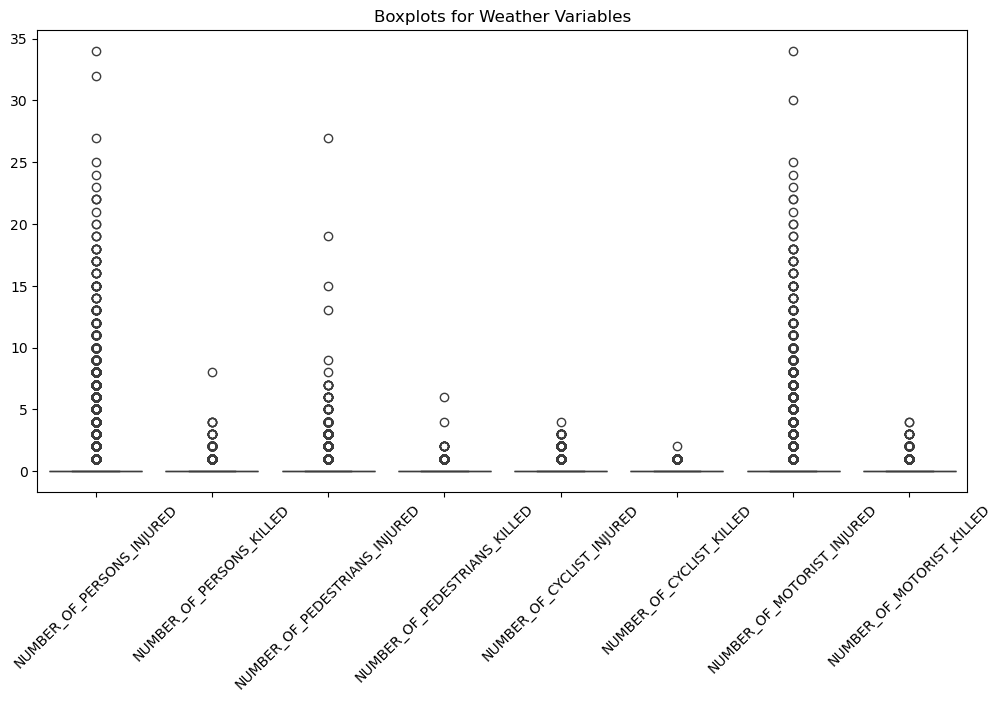

In [ ]:
#Plot the injury and fatality values
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["NUMBER_OF_PERSONS_INJURED", "NUMBER_OF_PERSONS_KILLED", "NUMBER_OF_PEDESTRIANS_INJURED", "NUMBER_OF_PEDESTRIANS_KILLED", "NUMBER_OF_CYCLIST_INJURED", "NUMBER_OF_CYCLIST_KILLED", "NUMBER_OF_MOTORIST_INJURED", "NUMBER_OF_MOTORIST_KILLED" ]])
plt.xticks(rotation=45)
plt.title("Boxplots for Weather Variables")
plt.show()

In [ ]:
#Export df
df.to_csv("data/cleaned_data.csv", index=False)